<a href="https://colab.research.google.com/github/Saurabhrai08/ML_Prodigy_infotech./blob/main/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans


 Load Your Data

In [ ]:
data = pd.read_csv('/content/Mall_Customers.csv')

Preview the DataFrame

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Preprocess the Data

In [ ]:
# Encode Gender
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

# Select features
X = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Optimal Number of Clusters (Elbow Method)

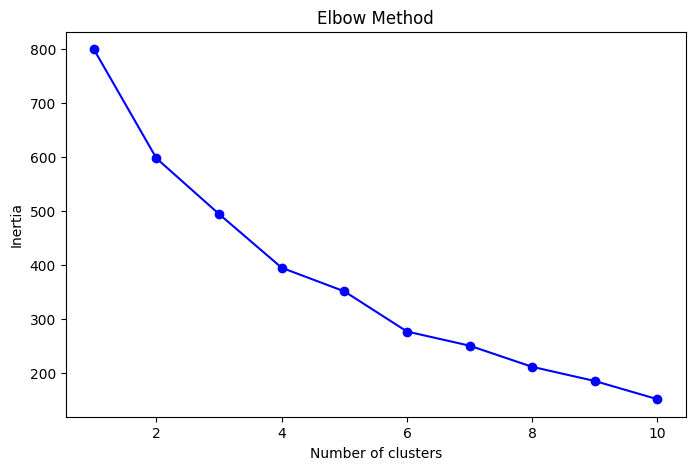

In [ ]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


Fit the K-Means Model

In [ ]:
optimal_k = 5  # set after inspecting the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['Cluster'] = clusters


Visualize the Clusters

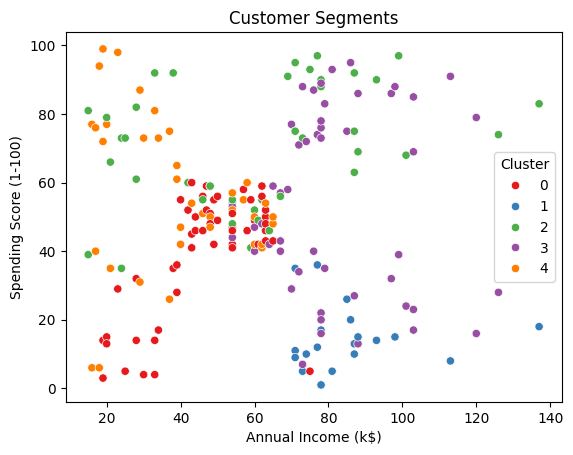

In [ ]:
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    data=data
)
plt.title('Customer Segments')
plt.show()


 Analyze Cluster Characteristics

In [ ]:
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)


         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         65.333333  0.509804  56.470588           46.098039   
1        159.500000  1.000000  39.500000           85.150000   
2        100.809524  1.000000  28.690476           60.904762   
3        151.510204  0.000000  37.897959           82.122449   
4         50.526316  0.000000  27.315789           38.842105   

         Spending Score (1-100)  
Cluster                          
0                     39.313725  
1                     14.050000  
2                     70.238095  
3                     54.448980  
4                     56.210526  
